In [ ]:
## Notebook env: mirtud_env (R kernel)


In [1]:
library(ggplot2)
library(tidyr)

In [2]:
## load in data
g2m_increasing_TuDs_tRFs_proliferation_assay = read.csv('/home/ssobti/projects/mir_tud/wetlab_followup_data/cellcycle/042224_tRF_proliferation_assay_g2m_increasing_hits_only_raw_data.txt', sep='\t', header=T)
colnames(g2m_increasing_TuDs_tRFs_proliferation_assay) = c('Time Stamp', 'Elapsed hours', 'Control', 'NC1', 'NC2', 'tRNA-Ala-TGC', 'tRNA-Gln-TTG')
g2m_increasing_TuDs_tRFs_proliferation_assay = g2m_increasing_TuDs_tRFs_proliferation_assay[c('Elapsed hours', 'Control', 'NC1', 'NC2', 'tRNA-Ala-TGC', 'tRNA-Gln-TTG')]
g2m_increasing_TuDs_tRFs_proliferation_assay

Elapsed hours,Control,NC1,NC2,tRNA-Ala-TGC,tRNA-Gln-TTG
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4.188629,8.213484,6.373470,6.136572,3.907483
6,4.856179,9.613767,7.561189,6.956570,4.526094
12,5.543260,11.420970,8.763806,8.210837,5.182299
18,6.517513,13.410450,10.350630,9.452394,6.004122
24,7.393930,15.558390,12.091500,10.768560,6.887032
30,8.494860,18.044640,14.068970,12.507070,7.886609
36,9.644096,21.192560,16.249460,14.525670,9.070771
42,10.933070,24.925800,19.119200,16.721860,10.429290
48,12.567130,29.008120,22.031950,19.369100,11.855510


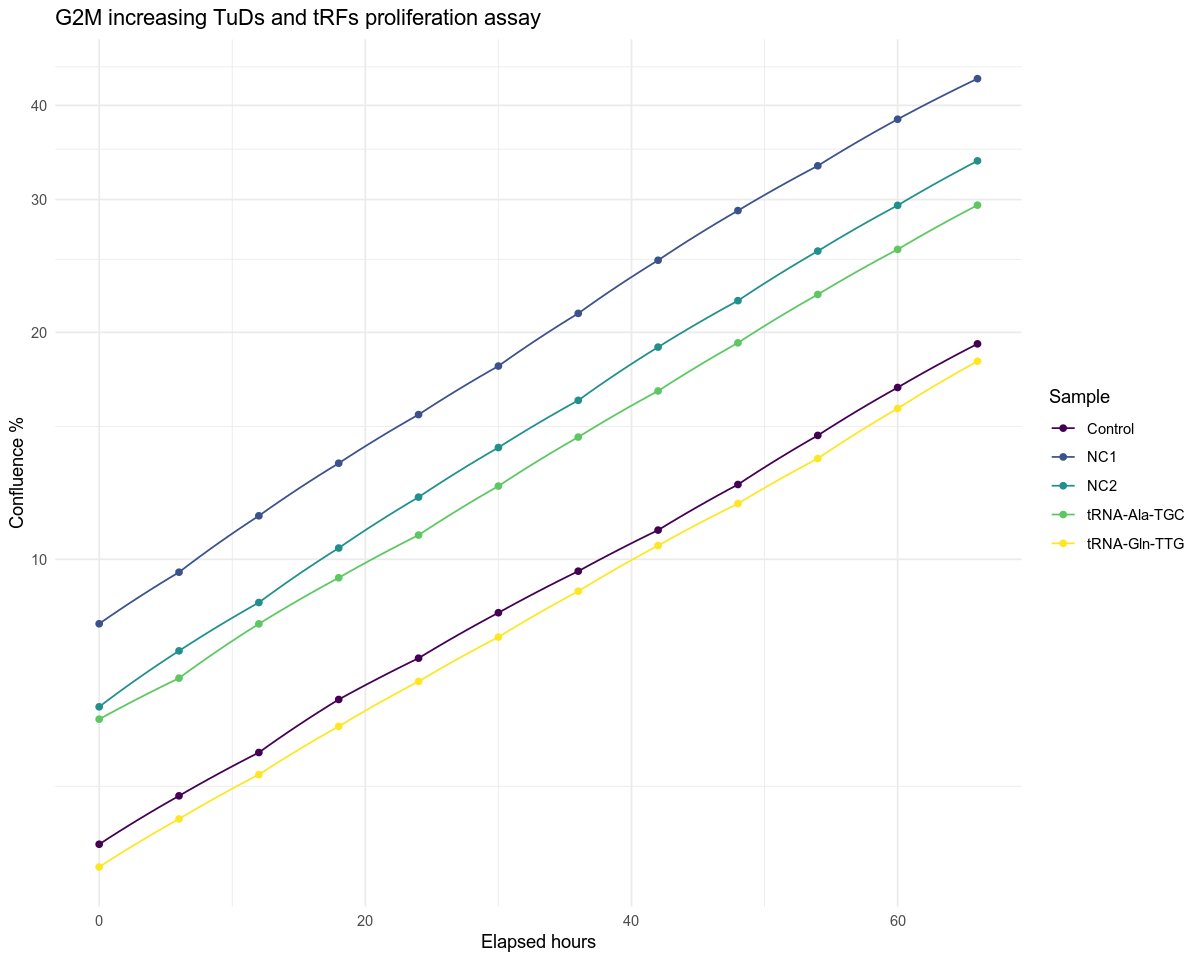

In [3]:
options(repr.plot.width=10, repr.plot.height=8)
g2m_increasing_TuDs_tRFs_proliferation_assay %>% 
  pivot_longer(cols = -`Elapsed hours`, names_to = "Sample", values_to = "OD") %>% 
  ggplot(aes(x = `Elapsed hours`, y = OD, color = Sample)) +
  geom_line() +
  geom_point() +
  theme_minimal() + coord_trans(y = "log2") + viridis::scale_color_viridis(discrete = TRUE) +
  labs(title = "G2M increasing TuDs and tRFs proliferation assay",
       x = "Elapsed hours",
       y = "Confluence %")

In [76]:
slopes = list()
n = 1
for (i in 1:length(colnames(g2m_increasing_TuDs_tRFs_proliferation_assay))){
    if (i != 1){
        slopes[[n]] = as.numeric(coef(lm(g2m_increasing_TuDs_tRFs_proliferation_assay[,i] ~ g2m_increasing_TuDs_tRFs_proliferation_assay$`Elapsed hours`))[2])
        n = n + 1
    }
}

names(slopes) = colnames(g2m_increasing_TuDs_tRFs_proliferation_assay)[!colnames(g2m_increasing_TuDs_tRFs_proliferation_assay) %in% 'Elapsed hours']
unlist(slopes)

Control          NC1          NC2 tRNA-Ala-TGC tRNA-Gln-TTG 
   0.2215189    0.5289652    0.4069429    0.3469460    0.2100194

In [75]:
slopes

$Control
[1] 0.2215189

$NC1
[1] 0.5289652

$NC2
[1] 0.4069429

$`tRNA-Ala-TGC`
[1] 0.346946

$`tRNA-Gln-TTG`
[1] 0.2100194

In [81]:
## look at second derivative of the data
g2m_increasing_TuDs_tRFs_proliferation_assay
second_derivatives = data.frame(apply(log2_g2m_increasing_TuDs_tRFs_proliferation_assay, 2, function(x) mean(diff(diff(x)/6)/6)))
colnames(second_derivatives) = 'Second Derivative'
second_derivatives

Elapsed hours,Control,NC1,NC2,tRNA-Ala-TGC,tRNA-Gln-TTG
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4.188629,8.213484,6.373470,6.136572,3.907483
6,4.856179,9.613767,7.561189,6.956570,4.526094
12,5.543260,11.420970,8.763806,8.210837,5.182299
18,6.517513,13.410450,10.350630,9.452394,6.004122
24,7.393930,15.558390,12.091500,10.768560,6.887032
30,8.494860,18.044640,14.068970,12.507070,7.886609
36,9.644096,21.192560,16.249460,14.525670,9.070771
42,10.933070,24.925800,19.119200,16.721860,10.429290
48,12.567130,29.008120,22.031950,19.369100,11.855510


,Second Derivative
,<dbl>
Elapsed hours,0.000000e+00
Control,-5.853437e-05
NC1,-1.342726e-04
NC2,-1.401075e-04
tRNA-Ala-TGC,3.882322e-05
tRNA-Gln-TTG,-1.101071e-05
